<a href="https://colab.research.google.com/github/paolaportilloj/Visualizaci-n-de-datos-para-la-toma-de-decisiones/blob/main/Avancespb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Base de datos a alumnos del Tecnológico de Monterrey**

Se generó una encuesta a diversos estudiantes del Tec en donde cuentan con una carrera, edad y semestre diferente. Se recolectó información acerca de sus gustos e información personal.

In [382]:
path='/content/drive/MyDrive/5to semestre/1er periodo/Visualización de datos para la toma de decisiones/Base de datos de estudiantes TEC.xlsx'

In [383]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [384]:
df = pd.read_excel(path)

In [385]:
cols=df.columns

In [386]:
df.shape

(29, 31)

In [387]:
cols=cols.to_list()

In [388]:
df.index = df.index + 1

### **¿Cuántos hombres y mujeres hay en la base de datos?**

In [389]:
countsDF = pd.pivot_table(data=df,
               index='Genero',
               values='Quién es mejor',
               aggfunc='count',
               )


In [390]:
countsDF=countsDF.rename({'Quién es mejor':'Hombres VS. Mujeres'},
                     axis=1)
countsDF

,Hombres VS. Mujeres
Genero,
Hombre,17
Mujer,12


In [391]:
countsDF.reset_index(inplace=True)

In [392]:
t=countsDF.loc[:,'Hombres VS. Mujeres'].sum()

In [393]:
countsDF['%']=countsDF.loc[:,'Hombres VS. Mujeres']

In [394]:
countsDF.columns

Index(['Genero', 'Hombres VS. Mujeres', '%'], dtype='object')

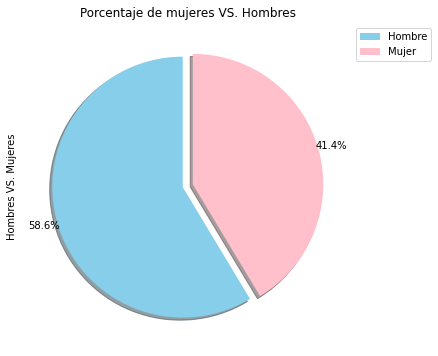

In [395]:
cols=['skyblue', 'pink']
explode_dis=[0.04,0.04]
countsDF['Hombres VS. Mujeres'].plot(kind='pie',
                        figsize=(15,6),
                        startangle=90,
                        labels=None,
                        autopct='%1.1f%%',
                        pctdistance=1.1,
                        colors=cols,
                        explode=explode_dis,
                        shadow=True,
)
plt.title('Porcentaje de mujeres VS. Hombres')
plt.legend(labels=countsDF.Genero,
           bbox_to_anchor=(1,1)
           );

### **Edad de hombres y mujeres y carrera**


In [396]:
c=pd.pivot_table(data=df,
                 index= ['Edad','Genero','Carrera '],
                 aggfunc='count',
                 values='Quién es mejor'
)
c=c.rename({'Quién es mejor':'Genero '},
                     axis=1)


In [397]:
c=c.reset_index()

In [398]:
fig=px.sunburst(c,
                path=['Genero','Edad', 'Carrera '],
                values='Genero '
                )
fig.show()

### **¿Cuántos foráneos hay?**

In [399]:
counts = pd.pivot_table(data=df,
               index='Foráneo',
               values='Quién es mejor',
               aggfunc='count',
               )
counts=counts.rename({'Quién es mejor':'Foreános VS Regios'},
                     axis=1)
counts

,Foreános VS Regios
Foráneo,
No,9
Si,20


In [400]:
counts.reset_index(inplace=True)

**Porcentaje de foráneos y regios**


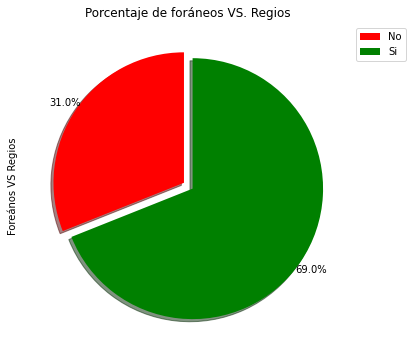

In [401]:
cols=['red', 'green']
explode_dis=[0.04,0.04]
counts['Foreános VS Regios'].plot(kind='pie',
                        figsize=(15,6),
                        startangle=90,
                        labels=None,
                        autopct='%1.1f%%',
                        pctdistance=1.1,
                        colors=cols,
                        explode=explode_dis,
                        shadow=True,
)
plt.title('Porcentaje de foráneos VS. Regios')
plt.legend(labels=counts.Foráneo,
           bbox_to_anchor=(1,1)
            );

### **¿Los foráneos tienen menor promedio?**

In [416]:
f=pd.pivot_table(data=df,
                 index= ['Foráneo'],
                 #aggfunc='count',
                 values='Promedio global'
)
#f=f.rename({'Quién es mejor':'Foraneo '},
                     #axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:507: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



In [417]:
f.reset_index(inplace=True)

In [418]:
f

,Foráneo
0,No
1,Si


In [405]:
r=f.loc[:,'Foraneo '].sum()

KeyError: ignored

In [ ]:
f['%']=f.loc[:,'Foraneo ']

In [ ]:
f

In [ ]:
df1.groupby(['23. Color Favorito','6. Sexo','8. Mejor superbowl en los últimos 5 años']).size()

¿Cuántos hombres que piensan que juega mejor Messi le van a rayados?

In [ ]:
df = df.reset_index()

In [ ]:
df.index = df.index + 1

In [ ]:
df2 = df[['25. ¿Quién es mejor?','6. Sexo','16. Equipo favorito mexicano de fútbol']]
df2 = df2.set_index(['25. ¿Quién es mejor?','6. Sexo','16. Equipo favorito mexicano de fútbol'])
df2.loc['Messi','Hombre', 'Rayados']

In [ ]:
df2.groupby(['25. ¿Quién es mejor?','6. Sexo','16. Equipo favorito mexicano de fútbol']).size()